In [1]:
import numpy as np
import pandas as pd

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Stationarity_1.csv')

In [3]:
df.head()

,Date,Original,Value
0,2019-05-09,39.598750,0.000000
1,2019-05-10,39.092500,-0.506250
2,2019-05-11,39.092500,0.000000
3,2019-05-12,39.092500,0.000000
4,2019-05-13,38.293751,-0.798749


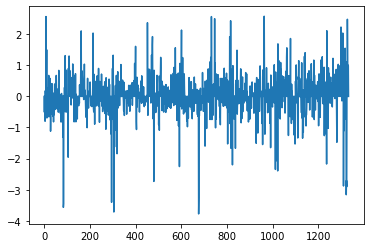

In [4]:
import matplotlib.pyplot as plt
plt.plot(df['Value'])
plt.show()

In [5]:
from scipy.stats import kurtosis
kurt = kurtosis(df['Value'], fisher=True)
print("Kurtosis:", kurt)

Kurtosis: 7.904088446796596


In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

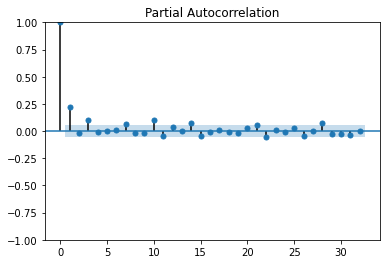

In [7]:
plot_pacf(np.array(df['Value'])**2,method='ywm')
plt.show()

garch(2,2) nebo

In [8]:
from arch import arch_model

In [17]:
model=arch_model(np.array(df['Value']),p=2,q=2)

In [18]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 10254.324930531184
Iteration:      2,   Func. Count:     19,   Neg. LLF: 251139.33627761662
Iteration:      3,   Func. Count:     28,   Neg. LLF: 1322.683651700855
Iteration:      4,   Func. Count:     38,   Neg. LLF: 1290.9201382191936
Iteration:      5,   Func. Count:     47,   Neg. LLF: 1371.268805972703
Iteration:      6,   Func. Count:     56,   Neg. LLF: 1200.2434883675173
Iteration:      7,   Func. Count:     64,   Neg. LLF: 1200.2553085490426
Iteration:      8,   Func. Count:     72,   Neg. LLF: 1199.9900192872037
Iteration:      9,   Func. Count:     80,   Neg. LLF: 1196.0584460714228
Iteration:     10,   Func. Count:     88,   Neg. LLF: 1192.2993311435284
Iteration:     11,   Func. Count:     96,   Neg. LLF: 1191.9501942398924
Iteration:     12,   Func. Count:    104,   Neg. LLF: 1191.6996697606353
Iteration:     13,   Func. Count:    112,   Neg. LLF: 1192.3467401626824
Iteration:     14,   Func. Count:    120,   Neg. LLF:

In [19]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1191.65
Distribution:                  Normal   AIC:                           2395.30
Method:            Maximum Likelihood   BIC:                           2426.47
                                        No. Observations:                 1333
Date:                Sat, Jul 01 2023   Df Residuals:                     1332
Time:                        12:28:13   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0287  1.526e-02      1.878  6.042e-02 [-1.255e-03,5.856e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0604  2.487e-02      2.428  1.517e-02  [1.165e-02,  0.109]
alpha[1]       0.1554  4.682e-02      3.320  9.009e-04  [6.367e-02,  0.247]
alpha[2]   5.5885e-03  5.029e-02      0.111      0.912 [-9.297e-02,  0.104]
beta[1]        0.1195  8.711e-02      1.372      0.170 [-5.120e-02,  0.290]
beta[2]        0.5722  5.461e-02     10.477  1.097e-25    [  0.465,  0.679]
===========================================================================

Covariance estimator: robust
"""

Try GARCH(2,0) =ARCH(2)

In [22]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = np.array(df['Value'])[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [24]:
rolling_predictions = pd.Series(rolling_predictions, index=df['Value'].index[-365:])

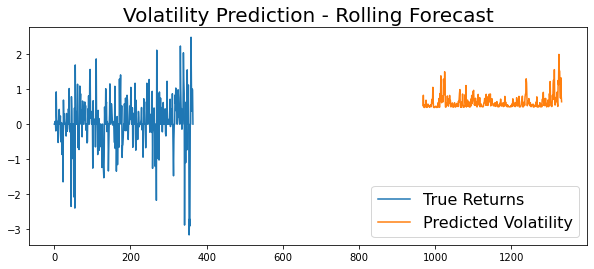

In [26]:
plt.figure(figsize=(10,4))
true, = plt.plot(np.array(df['Value'])[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)